## 今天的範例，帶大家實際操作鐵達尼號的資料集
關於重覆和遺失值處理

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

### 輸入訓練資料(loading data)

In [4]:
df_train = pd.read_csv("Titanic_train.csv")


In [8]:
#印出前幾筆看資料的狀態
display(df_train.head(10))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
# 資料的比數
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 探索性分析:
*  觀察-是否有重覆

In [10]:
#產生一個不重覆的資料集，透過 drop_duplicates 函數
nodup_df_train=df_train.drop_duplicates(subset=None, keep='first', inplace=False)

if nodup_df_train.shape[1]==df_train.shape[1]:
 print("no duplicates")


no duplicates


In [11]:
#顯示有重覆的資訊:
df_train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

### 探索性分析:
*  觀察-是否有遺失值

In [12]:
#判斷每一個資料點，是否為空值:
print(df_train.isnull().head(5))


# 会判断哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(df_train.isnull().any())

# 統計 data 裡有空值的變數個數
print(df_train.isnull().any().sum())



   PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False  
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
3


In [46]:
# 當有些資料用 "null" 代表空值時，需要先做轉換，
df_train= df_train.replace('null',np.NaN)
# 統計 data 裡每一列是否有空值
print(df_train.isnull().any())

# 統計 data 裡有空值的變數個數
print(df_train.isnull().any().sum())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
3


In [47]:
#可以只顯示存在缺失值的行列，清楚地確定缺失值的狀態
# 代表有缺時的地方才顯示df_train.isnull().values==True
df_train[df_train.isnull().values==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 補值

29.69911764705882
14.526497332334044
23.79929292929293
17.596074065915886


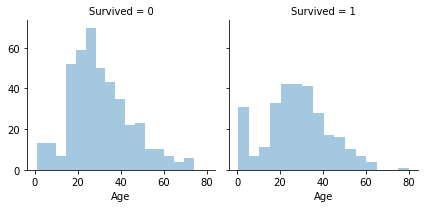

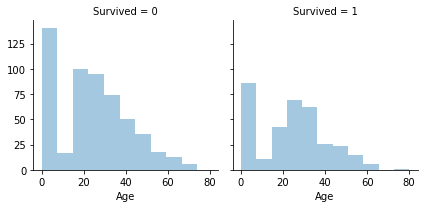

In [48]:
# 我們以  Age 為例，進行補植，補固定值
#補值前 平均值
print(df_train['Age'].mean()) #age平均
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

#補值後
df_train['Age']=df_train['Age'].fillna(0)
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
df_train[df_train['Age'].isnull().values==True]
#補完就沒有遺失值了，但是看到這樣的補值效果，平均值上有很明顯的差異，
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)


## 可以看出死亡族群，年齡遺失的比例比較高
用0 來補不是一個好的策略

29.69911764705882
14.526497332334044
29.699117647058763
13.002015226002884


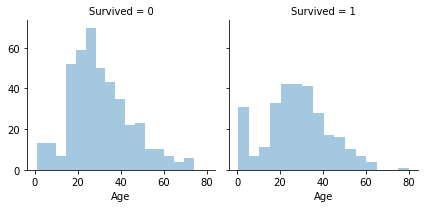

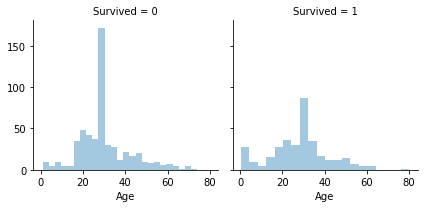

In [49]:
# 我們以  Age 為例，進行補植，補平均數
#補值前 平均值
df_train = pd.read_csv("Titanic_train.csv")
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#補值後
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
df_train[df_train['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

## 圖形中高點的位置，就是平均數的位置

29.69911764705882
14.526497332334044
29.87056116722783
14.59766765730238


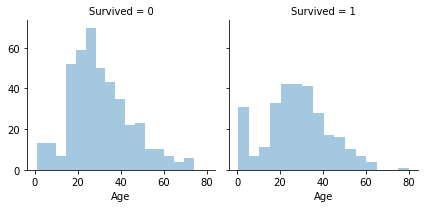

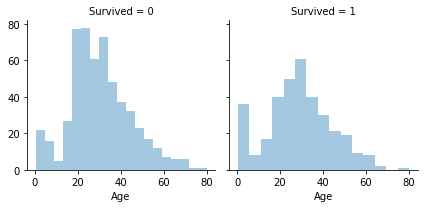

In [50]:
# 我們以  Age 為例，進行，由後往前補
#補值前 平均值
df_train = pd.read_csv("Titanic_train.csv")
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#補值後
df_train['Age']=df_train['Age'].fillna(method='bfill')
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
df_train[df_train['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

## 由後往前補
比較平均，不像前兩個方法，集中在某一些值上面。

29.69911764705882
14.526497332334044
29.581560044893376
14.554589813600963


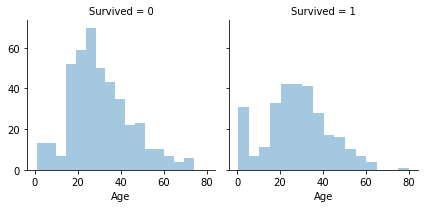

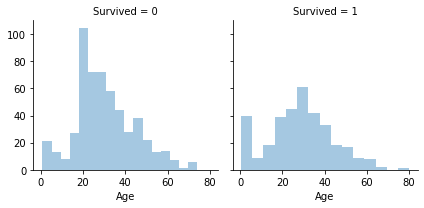

In [51]:
# 我們以  Age 為例，進行，由後往前補
#補值前 平均值
df_train = pd.read_csv("Titanic_train.csv")
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#補值後
df_train['Age']=df_train['Age'].fillna(method='pad')
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
df_train[df_train['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

## 由後往前補
比較平均，不像前兩個方法，集中在某一些值上面。

### 大家可以透過這樣的方式，自己嘗試玩另外兩種遺失的資料。

In [47]:
print(df_train.shape)
print(df_train['Age'].isnull().sum())
print(df_train['Cabin'].isnull().sum())
print(df_train['Embarked'].isnull().sum())

(891, 12)
177
687
2


In [64]:
r = df_train.shape[0]
df_train[['Age','Cabin','Embarked']].isnull().sum()/r*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [19]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [26]:
df_train[df_train['Cabin']!= 'B28' ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
print(df_train.groupby('Embarked').size())
df_train.groupby('Embarked').aggregate({'Age':['median','mean','std'],
                                        'Fare':['median','mean','std']})

Embarked
C    168
Q     77
S    644
dtype: int64


Age                         Fare                      
         median       mean        std median       mean        std
Embarked                                                          
C          29.0  30.814769  15.434860  29.70  59.954144  83.912994
Q          27.0  28.089286  16.915396   7.75  13.276030  14.188047
S          28.0  29.445397  14.143192  13.00  27.079812  35.887993

In [41]:
df_train.groupby(['Sex','Embarked']).aggregate({'Age':['median','mean','std'],
                                        'Fare':['median','mean','std']})

Age                            Fare                      
                median       mean        std    median       mean        std
Sex    Embarked                                                             
female C          24.0  28.344262  15.770830  56.92920  75.169805  83.574380
       Q          21.5  24.291667   8.147667   7.76875  12.634958  14.298841
       S          27.0  27.771505  13.690703  24.15000  38.740929  46.047877
male   C          30.0  32.998841  14.905440  24.00000  48.262109  82.715093
       Q          30.0  30.937500  21.122559   7.75000  13.838922  14.243486
       S          28.0  30.291440  14.310342  10.50000  21.711996  28.584699

In [43]:
df_train.groupby('Cabin').Name.count().sort_values()

Cabin
A10            1
D30            1
D28            1
D21            1
D19            1
              ..
C22 C26        3
F2             3
C23 C25 C27    4
G6             4
B96 B98        4
Name: Name, Length: 147, dtype: int64